In [1]:
from datetime import date
studentName="Michael K"
studentEmail="m.k@northeastern.edu"
homework=7
contributedPercentage=0
print("IE 7300: Statistical learning for Engineering")
print("\n"*15)
print(f'Homework -{homework}')
print(f'Student name :{studentName}')
print(f'Student Email :{studentEmail}')
print("\n"*15)
print(f'Percentage of Effort Contributed by Student : {contributedPercentage}%')
print(f'Submission Date: {date.today()}')

IE 7300: Statistical learning for Engineering
















Homework -7
Student name :Michael K
Student Email :m.k@northeastern.edu
















Percentage of Effort Contributed by Student : 0%
Submission Date: 2022-11-01


In [1]:
## imports ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

#Custom decision tree regressor
from statmodels.decisiontrees import decisiontreeregressor
#Custom random forest regressor
from statmodels.random_forest import RandomForestRegressor
#Custom lasso regressor
from statmodels.regression import LassoRegression
#Custom gradient boosting regressor
from statmodels.gradientboosting import GradientBoostTreeRegressor

#Find performance
from sklearn.metrics import mean_squared_error, r2_score

## Boston House Prices Dataset - Regression

We can now look at a regression problem, the boston house prices dataset. Let's import these data into the notebook, and do some exploratory analysis.

In [2]:
import warnings
warnings.filterwarnings("ignore")

#load the boston dataset
data = load_boston()
#obtain input data
X = data.data
#obtain labels
Y = data.target
#obtain input labels
names = data.feature_names
#convert input features to dataframe
dfX = pd.DataFrame(X,columns=names)

In [3]:
#create a random forest with default values
rfr = RandomForestRegressor()

In [4]:
## train the ensemble & view estimates for prediction error ##
rfr.fit(dfX.values,Y)
y_hat = rfr.predict(X)

In [5]:
print('Random Forest - Mean Squared error:', round(mean_squared_error(Y,y_hat),4))
print('Random Forest - R-Squared:', round(r2_score(Y,y_hat),4))

Random Forest - Mean Squared error: 1.5464
Random Forest - R-Squared: 0.9817


### Decision Tree regressor

In [6]:
dtModel = decisiontreeregressor(min_samples_split=3, max_depth=3)
dtModel.fit(dfX,Y.reshape(-1,1))
y_hat = dtModel.predict(dfX.values)

In [7]:
print('Decision Tree - Mean Squared error:', round(mean_squared_error(Y,y_hat),4))
print('Decision Tree - R-Squared:', round(r2_score(Y,y_hat),4))

Decision Tree - Mean Squared error: 9.6458
Decision Tree - R-Squared: 0.8857


In [8]:
dfX.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Print decision tree

In [9]:
dtModel.print_tree()

|- RM <= 6.939 :Variance Red 38.2205
 left-->|- LSTAT <= 14.37 :Variance Red 17.0043
  left-->|- DIS <= 1.3567 :Variance Red 9.8836
    left-->|- CRIM <= 9.2323 :Variance Red 78.1456
        left-->50.0
        right-->27.9
    right-->|- RM <= 6.54 :Variance Red 5.7677
        left-->21.6297
        right-->27.4273
  right-->|- CRIM <= 6.96215 :Variance Red 6.4961
    left-->|- NOX <= 0.524 :Variance Red 2.591
        left-->20.0208
        right-->16.239
    right-->|- NOX <= 0.597 :Variance Red 4.1939
        left-->16.6333
        right-->11.0774
 right-->|- RM <= 7.42 :Variance Red 40.2758
  left-->|- CRIM <= 6.53876 :Variance Red 21.8897
    left-->|- DIS <= 1.8773 :Variance Red 7.3814
        left-->45.65
        right-->32.7488
    right-->|- CRIM <= 19.6091 :Variance Red 8.0
        left-->16.4
        right-->10.4
  right-->|- CRIM <= 2.01019 :Variance Red 18.5547
    left-->|- PTRATIO <= 14.7 :Variance Red 5.3915
        left-->48.3
        right-->43.6533
    right-->21.9


### List of features used in the decision tree

In [10]:
dtFeatures = pd.DataFrame(dtModel.get_features())
dtFeatures.columns = ['featurename','treelevel']
dtFeatures = dtFeatures.drop_duplicates()
dtFeatures.sort_values('treelevel')

,featurename,treelevel
13,RM,0
6,LSTAT,1
12,RM,1
2,DIS,2
5,CRIM,2
0,CRIM,3
1,RM,3
3,NOX,3
7,DIS,3
10,PTRATIO,3


### Lasso Regression

In [11]:
sc = StandardScaler()
dfX_tranformed = pd.DataFrame(sc.fit_transform(dfX))

lassoModel = LassoRegression(alpha=0.1)
lassoModel.fit(dfX_tranformed.values, Y) 
print("Lasso model cofficients :",lassoModel.coef_)
y_hat = lassoModel.predict(dfX_tranformed.values)

print('Lasso Regression - Mean Squared error:', round(mean_squared_error(Y,y_hat),4))
print('Lasso Regression - R-Squared:', round(r2_score(Y,y_hat),4))

Lasso model cofficients : [ 2.25328063e+01 -7.36524582e-01  8.22488980e-01 -1.10785150e-01
  6.94754817e-01 -1.73187104e+00  2.79299432e+00 -1.74063096e-04
 -2.71404959e+00  1.45705764e+00 -9.47138743e-01 -1.96532686e+00
  8.04627130e-01 -3.72516480e+00]
Lasso Regression - Mean Squared error: 22.1448
Lasso Regression - R-Squared: 0.7377


### Feature importance for Lasso regression

In [12]:
lassoImportantfeatures = pd.DataFrame(data={'feature': dfX.columns})
lassoImportantfeatures["importance"] = pd.DataFrame(lassoModel.coef_[1:])
lassoImportantfeatures = lassoImportantfeatures.sort_values(by='importance', ascending=False)

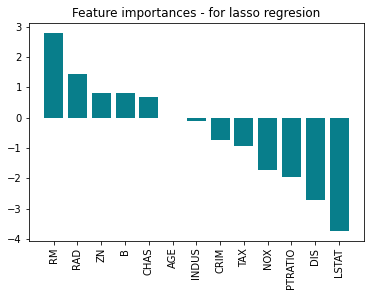

In [13]:
plt.bar(x=lassoImportantfeatures['feature'], height=lassoImportantfeatures['importance'], color='#087E8B')
plt.title('Feature importances - for lasso regresion')
plt.xticks(rotation='vertical')
plt.show()

### Gradient Boosting model

In [ ]:
gradBoostModel = GradientBoostTreeRegressor(n_elements=1000, learning_rate=0.01)
    
#fit the model
gradBoostModel.fit(X,Y)

y_hat = gradBoostModel.predict(X)

print('Gradient Boost Regression - Mean Squared error:', round(mean_squared_error(Y,y_hat),4))
print('Gradient Boost Regression - R-Squared:', round(r2_score(Y,y_hat),4))